<h1>CS 556 Project</h1>

<h2>1. Imports</h2>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
plt.style.use(['ggplot'])
%matplotlib inline
#test

<h2>2. Reading CSV </h2>

In [5]:
df = pd.read_csv('College_Admissions.csv')
df.head

<bound method NDFrame.head of      Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
395         396        324          110                  3  3.5   3.5  9.04   
396         397        325          107                  3  3.0   3.5  9.11   
397         398        330          116                  4  5.0   4.5  9.45   
398         399        312          103                  3  3.5   4.0  8.78   
399         400        333          117                  4  5.0   4.0  9.66   

     Research  Chance

<h2>3. Data and Distribution</h2>

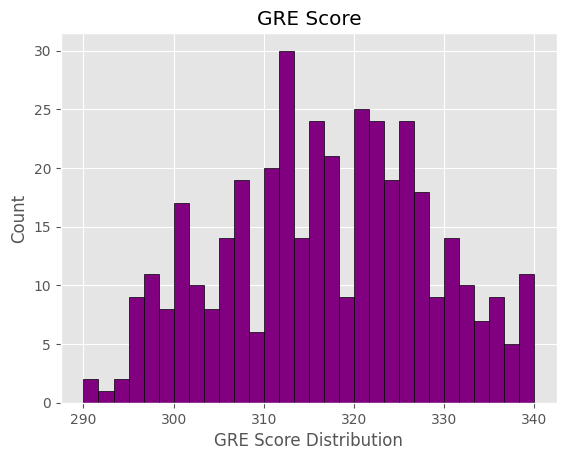

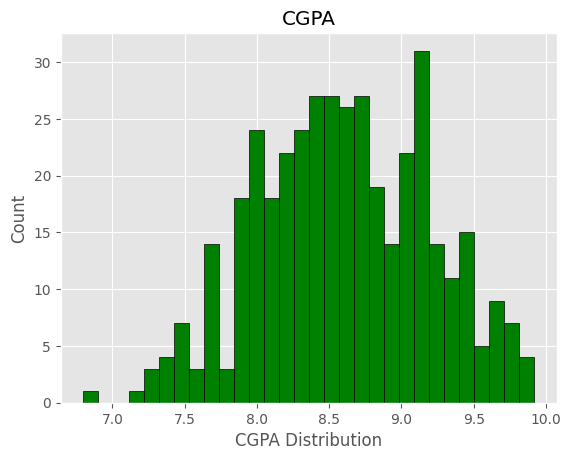

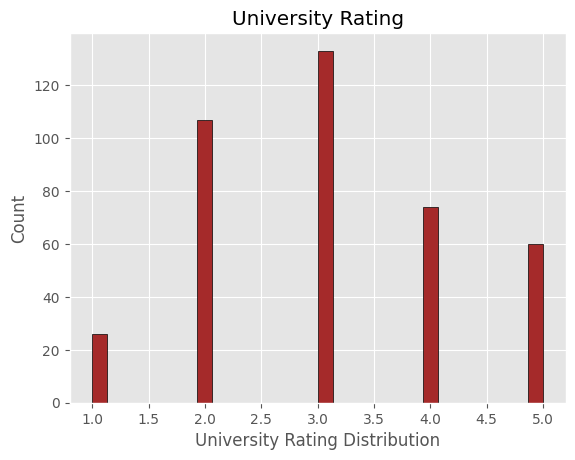

        GRE Score        CGPA  University Rating
count  400.000000  400.000000         400.000000
mean   316.807500    8.598925           3.087500
std     11.473646    0.596317           1.143728
min    290.000000    6.800000           1.000000
25%    308.000000    8.170000           2.000000
50%    317.000000    8.610000           3.000000
75%    325.000000    9.062500           4.000000
max    340.000000    9.920000           5.000000
                   GRE Score      CGPA  University Rating  Chance of Admit 
GRE Score           1.000000  0.833060           0.668976          0.802610
CGPA                0.833060  1.000000           0.746479          0.873289
University Rating   0.668976  0.746479           1.000000          0.711250
Chance of Admit     0.802610  0.873289           0.711250          1.000000


In [ ]:
datasets = ['GRE Score','CGPA','University Rating']
colors = ['purple', 'green', 'brown']

for dataset,c in zip(datasets,colors):
    plt.hist(df[dataset], bins=30, edgecolor = 'black', color= c)
    plt.title(dataset)
    plt.xlabel(f'{dataset} Distribution')
    plt.ylabel('Count')
    plt.show()
print(df[datasets].describe())

#Calculating correlation matrix
print(df[datasets + ['Chance of Admit ']].corr())




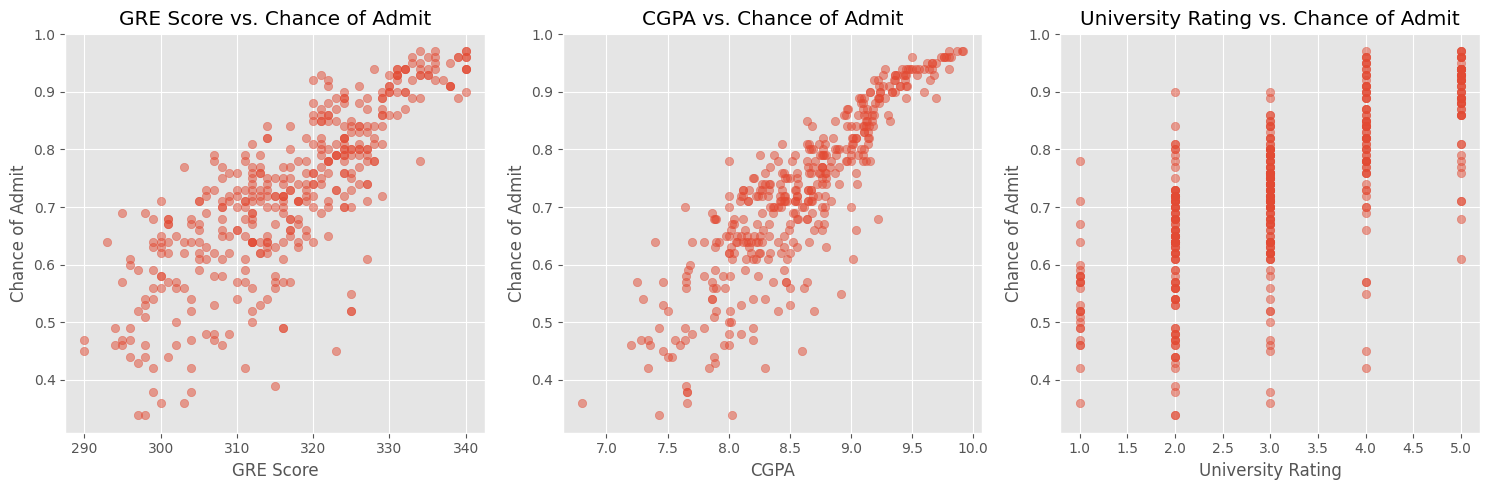

In [10]:
# Scatter plots of the three selected features vs Chance of Admit
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(df['GRE Score'], df['Chance of Admit '], alpha=0.5)
plt.title('GRE Score vs. Chance of Admit')
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit')

plt.subplot(1, 3, 2)
plt.scatter(df['CGPA'], df['Chance of Admit '], alpha=0.5)
plt.title('CGPA vs. Chance of Admit')
plt.xlabel('CGPA')
plt.ylabel('Chance of Admit')

plt.subplot(1, 3, 3)
plt.scatter(df['University Rating'], df['Chance of Admit '], alpha=0.5)
plt.title('University Rating vs. Chance of Admit')
plt.xlabel('University Rating')
plt.ylabel('Chance of Admit')
plt.tight_layout()
plt.show()

<h2>4. Splitting Datasets</h2>

In [ ]:
#Splitting the dataet into a training set and testing set
X = df[datasets]
y = df['Chance of Admit ']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<h2>5. Linear Regression Model 1: Without PCA </h2>

In [ ]:
# Train original model
model_original = LinearRegression()
model_original.fit(X_train_scaled, y_train)

# Predict
y_train_pred_original = model_original.predict(X_train_scaled)
y_test_pred_original = model_original.predict(X_test_scaled)

# Calculate MSEs
mse_train_original = mean_squared_error(y_train, y_train_pred_original)
mse_test_original = mean_squared_error(y_test, y_test_pred_original)

print(f'Mean Squared Error (Training) for Original Model: {mse_train_original}')
print(f'Mean Squared Error (Testing) for Original Model: {mse_test_original}')

# Save predictions
original_predictions_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_test_pred_original
})
original_predictions_df.to_csv('predictions_original.csv', index=False)


Mean Squared Error (Training) for Original Model: 0.004217669688301934
Mean Squared Error (Testing) for Original Model: 0.00484356821966046


<h2>6. Linear Regression Model 1: With PCA </h2>

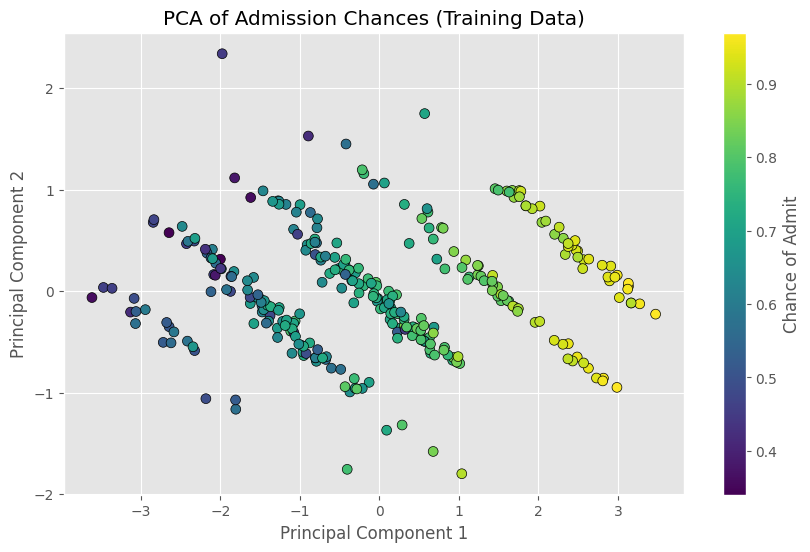

In [ ]:
# Applying PCA to reduce the dimensions to 2 components
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Visualize the PCA-transformed data
plt.figure(figsize=(10,6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis',edgecolor='k', s=50)
plt.title('PCA of Admission Chances (Training Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Chance of Admit')
plt.grid(True)
plt.show()


<h2>7. Training Linear Regression Models </h2>

In [ ]:
# Train PCA-based model
model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train)

# Predict
y_train_pred_pca = model_pca.predict(X_train_pca)
y_test_pred_pca = model_pca.predict(X_test_pca)

# Calculate MSEs
mse_train_pca = mean_squared_error(y_train, y_train_pred_pca)
mse_test_pca = mean_squared_error(y_test, y_test_pred_pca)

print(f'Mean Squared Error (Training) for PCA Model: {mse_train_pca}')
print(f'Mean Squared Error (Testing) for PCA Model: {mse_test_pca}')


Mean Squared Error (Training) for PCA Model: 0.004520111455799277
Mean Squared Error (Testing) for PCA Model: 0.0051508907094527856


<h2>8. Creating Scatter Plot </h2>

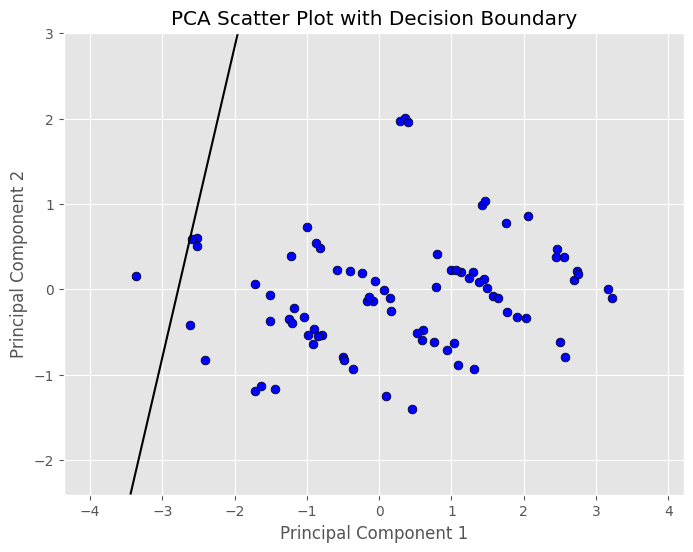

In [ ]:
# Save PCA model predictions
pca_predictions_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_test_pred_pca
})
pca_predictions_df.to_csv('predictions_pca.csv', index=False)

# Scatter plot of PCA points in blue and decision boundary in black
plt.figure(figsize=(8,6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c='blue', edgecolor='k', s=40)

# Create a mesh grid to plot decision boundary
x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_predictions = model_pca.predict(grid_points)
grid_predictions = grid_predictions.reshape(xx.shape)

# Draw contour line where prediction = 0.5
plt.contour(xx, yy, grid_predictions, levels=[0.5], colors='black')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot with Decision Boundary')
plt.show()

<h2>9. Summary Comparison </h2>

In [ ]:
# Display comparison
print("====== Model Performance Summary ======")
print(f'MSE (Training) Original Model: {mse_train_original}')
print(f'MSE (Testing) Original Model: {mse_test_original}')
print(f'MSE (Training) PCA Model: {mse_train_pca}')
print(f'MSE (Testing) PCA Model: {mse_test_pca}')

if mse_test_pca < mse_test_original:
    print("PCA-based model performed better on test data.")
else:
    print("Original model performed better on test data.")

====== Model Performance Summary ======
MSE (Training) Original Model: 0.004217669688301934
MSE (Testing) Original Model: 0.00484356821966046
MSE (Training) PCA Model: 0.004520111455799277
MSE (Testing) PCA Model: 0.0051508907094527856
Original model performed better on test data.


<h2>Practice</h2>

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB
None

First 5 rows:
   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104               

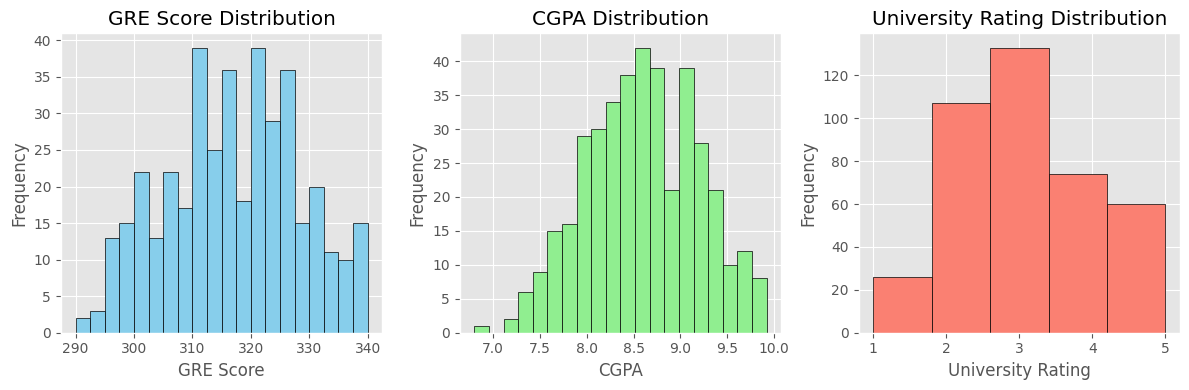


Correlation with Chance of Admit:
Serial No.: 0.0423
GRE Score: 0.8026
TOEFL Score: 0.7916
University Rating: 0.7113
SOP: 0.6757
LOR : 0.6699
CGPA: 0.8733
Research: 0.5532
Chance of Admit : 1.0000


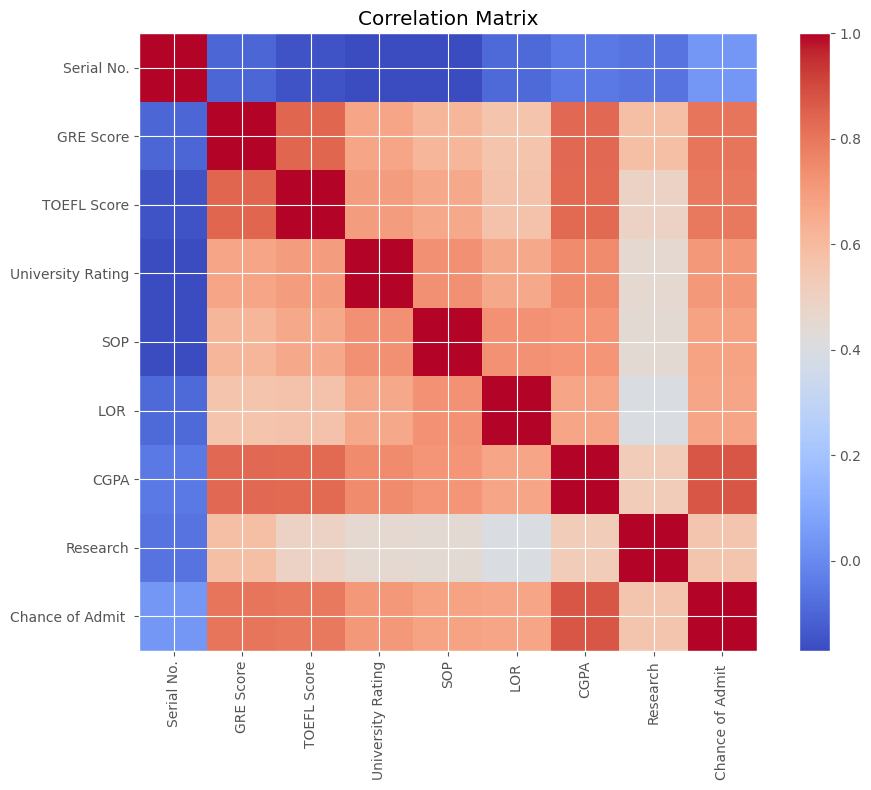

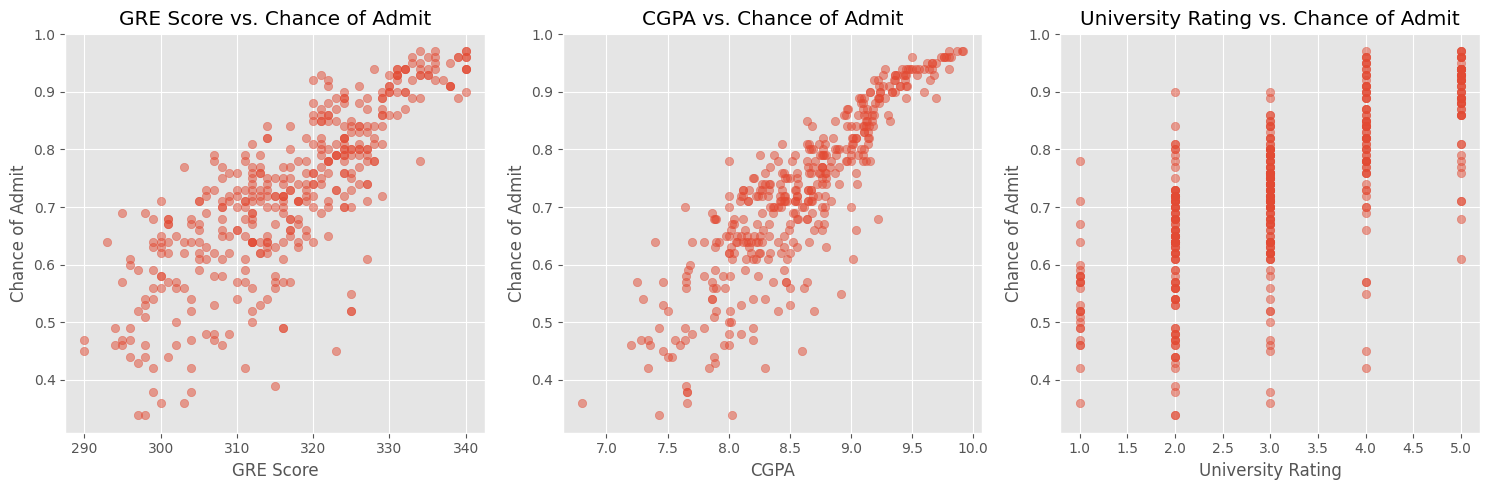


Training set size: 320 samples
Testing set size: 80 samples

--- Model 1: Linear Regression with all features ---
Training MSE: 0.003483
Testing MSE: 0.004617

Feature Coefficients:
             Feature  Coefficient
6               CGPA     0.098635
7           Research     0.021687
5               LOR      0.016574
3  University Rating     0.010820
2        TOEFL Score     0.003549
1          GRE Score     0.001958
4                SOP     0.001943
0         Serial No.     0.000181

--- Model 2: Linear Regression with PCA (2 components) ---
Explained variance ratio: [0.60778263 0.12551536]
Total explained variance: 0.7333
Training MSE: 0.003839
Testing MSE: 0.005212


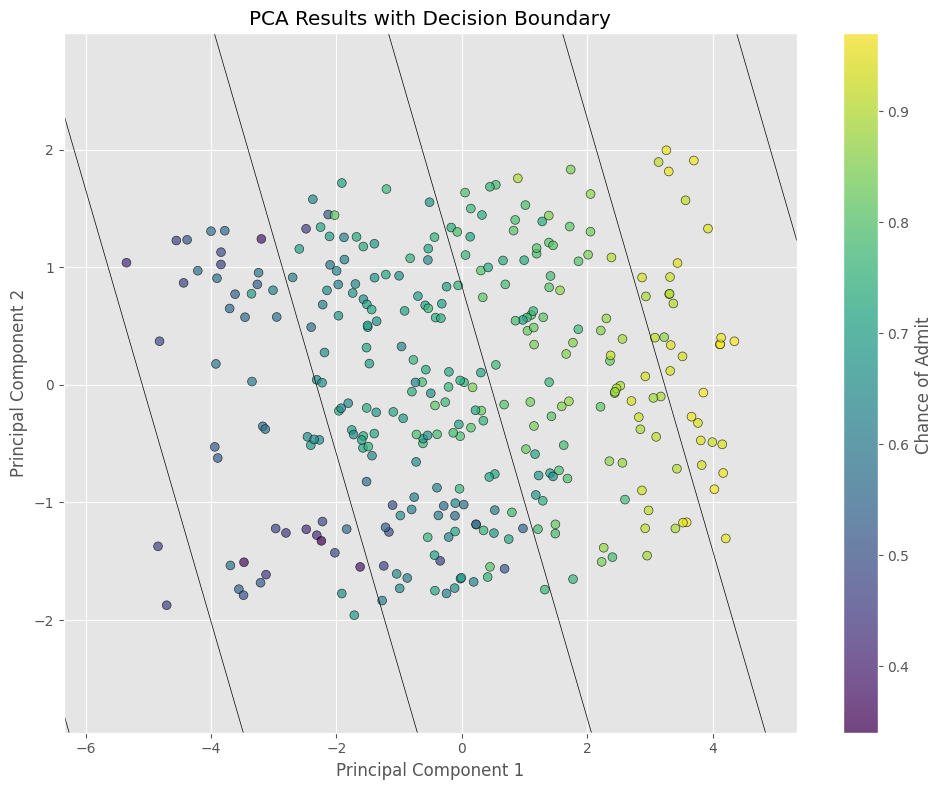


--- Model Comparison ---
Model 1 (All Features) - Training MSE: 0.003483, Testing MSE: 0.004617
Model 2 (PCA) - Training MSE: 0.003839, Testing MSE: 0.005212
Model 2 degraded performance by 12.89%

Conclusion:
Model 1 (using all features) performed better than the PCA model.
This suggests that all features contribute meaningful information for predicting admission chances.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
plt.style.use(['ggplot'])
%matplotlib inline

# Load the dataset
# Note: You'll need to replace 'college_admissions.csv' with your actual file name
data = pd.read_csv('college_admissions.csv')

# Display basic information about the dataset
print("Dataset Info:")
print(data.info())
print("\nFirst 5 rows:")
print(data.head())
print("\nBasic statistics:")
print(data.describe())

# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Feature Analysis - Let's examine three key features
print("\nAnalyzing key features...")

# Feature 1: GRE Score
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.hist(data['GRE Score'], bins=20, color='skyblue', edgecolor='black')
plt.title('GRE Score Distribution')
plt.xlabel('GRE Score')
plt.ylabel('Frequency')

# Feature 2: CGPA
plt.subplot(1, 3, 2)
plt.hist(data['CGPA'], bins=20, color='lightgreen', edgecolor='black')
plt.title('CGPA Distribution')
plt.xlabel('CGPA')
plt.ylabel('Frequency')

# Feature 3: University Rating
plt.subplot(1, 3, 3)
plt.hist(data['University Rating'], bins=5, color='salmon', edgecolor='black')
plt.title('University Rating Distribution')
plt.xlabel('University Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Correlation analysis
print("\nCorrelation with Chance of Admit:")
for column in data.columns:
    if column != 'Chance of Admit':
        correlation = data[column].corr(data['Chance of Admit '])
        print(f"{column}: {correlation:.4f}")

# Correlation Matrix Visualization
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# Scatter plots of the three selected features vs Chance of Admit
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(data['GRE Score'], data['Chance of Admit '], alpha=0.5)
plt.title('GRE Score vs. Chance of Admit')
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit')

plt.subplot(1, 3, 2)
plt.scatter(data['CGPA'], data['Chance of Admit '], alpha=0.5)
plt.title('CGPA vs. Chance of Admit')
plt.xlabel('CGPA')
plt.ylabel('Chance of Admit')

plt.subplot(1, 3, 3)
plt.scatter(data['University Rating'], data['Chance of Admit '], alpha=0.5)
plt.title('University Rating vs. Chance of Admit')
plt.xlabel('University Rating')
plt.ylabel('Chance of Admit')
plt.tight_layout()
plt.show()

# Split features and target
X = data.drop('Chance of Admit ', axis=1)
y = data['Chance of Admit ']

# Split data into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

# Model 1: Linear Regression with all features
print("\n--- Model 1: Linear Regression with all features ---")

# Initialize and train the model
model1 = LinearRegression()
model1.fit(X_train, y_train)

# Make predictions
y_train_pred1 = model1.predict(X_train)
y_test_pred1 = model1.predict(X_test)

# Calculate MSE
train_mse1 = mean_squared_error(y_train, y_train_pred1)
test_mse1 = mean_squared_error(y_test, y_test_pred1)

print(f"Training MSE: {train_mse1:.6f}")
print(f"Testing MSE: {test_mse1:.6f}")

# Feature importance (coefficients)
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model1.coef_
})
print("\nFeature Coefficients:")
print(coefficients.sort_values('Coefficient', ascending=False))

# Save predictions to CSV
pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred1
}).to_csv('model1_predictions.csv', index=False)

# Model 2: Linear Regression with PCA (2 components)
print("\n--- Model 2: Linear Regression with PCA (2 components) ---")

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Explained variance
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total explained variance: {sum(pca.explained_variance_ratio_):.4f}")

# Initialize and train the model
model2 = LinearRegression()
model2.fit(X_train_pca, y_train)

# Make predictions
y_train_pred2 = model2.predict(X_train_pca)
y_test_pred2 = model2.predict(X_test_pca)

# Calculate MSE
train_mse2 = mean_squared_error(y_train, y_train_pred2)
test_mse2 = mean_squared_error(y_test, y_test_pred2)

print(f"Training MSE: {train_mse2:.6f}")
print(f"Testing MSE: {test_mse2:.6f}")

# Save predictions to CSV
pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred2
}).to_csv('model2_predictions.csv', index=False)

# Visualize PCA results with decision boundary
plt.figure(figsize=(10, 8))

# Create a meshgrid for the decision boundary
h = 0.01
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the function values for the whole grid
Z = model2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create a color plot with the results
plt.contour(xx, yy, Z, colors='black', linewidths=0.5)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', 
            edgecolor='k', s=40, alpha=0.7)
plt.colorbar(label='Chance of Admit ')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Results with Decision Boundary')
plt.tight_layout()
plt.show()

# Compare both models
print("\n--- Model Comparison ---")
print(f"Model 1 (All Features) - Training MSE: {train_mse1:.6f}, Testing MSE: {test_mse1:.6f}")
print(f"Model 2 (PCA) - Training MSE: {train_mse2:.6f}, Testing MSE: {test_mse2:.6f}")

# Calculate improvement or degradation
improvement = (test_mse1 - test_mse2) / test_mse1 * 100
if improvement > 0:
    print(f"Model 2 improved performance by {improvement:.2f}%")
else:
    print(f"Model 2 degraded performance by {abs(improvement):.2f}%")

print("\nConclusion:")
if test_mse1 < test_mse2:
    print("Model 1 (using all features) performed better than the PCA model.")
    print("This suggests that all features contribute meaningful information for predicting admission chances.")
else:
    print("Model 2 (using PCA) performed better than using all features.")
    print("This suggests that dimension reduction effectively captured the essential patterns in the data.")

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB
None

First 5 rows:
   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104               

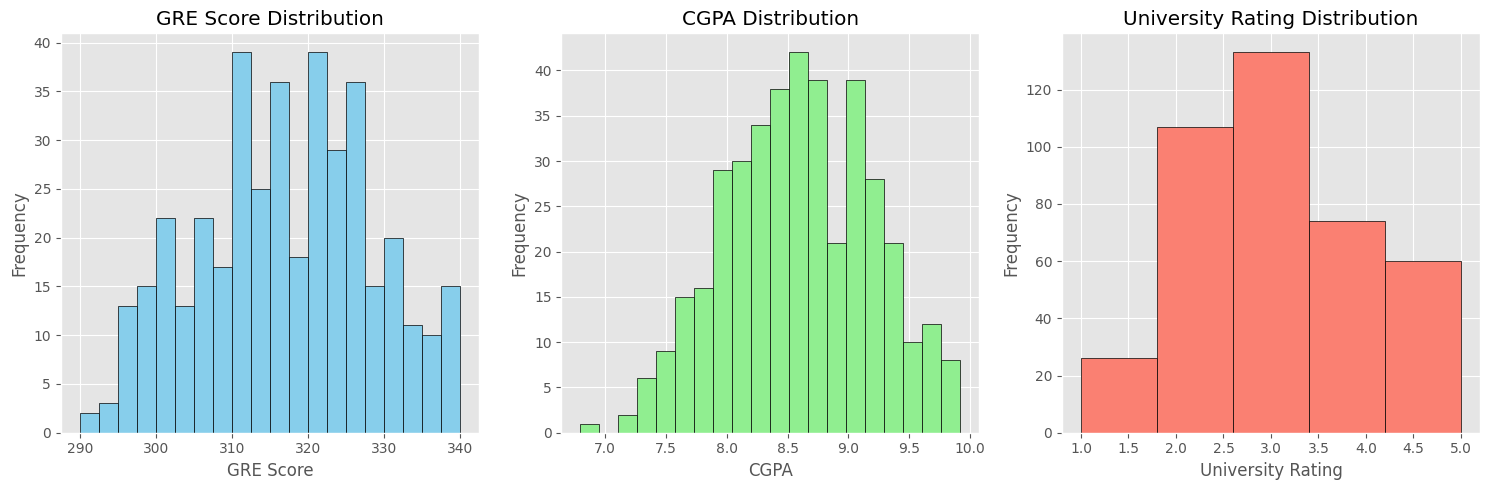


Correlation with Chance of Admit:
University Rating: 0.7113
CGPA: 0.8733
GRE Score: 0.8026


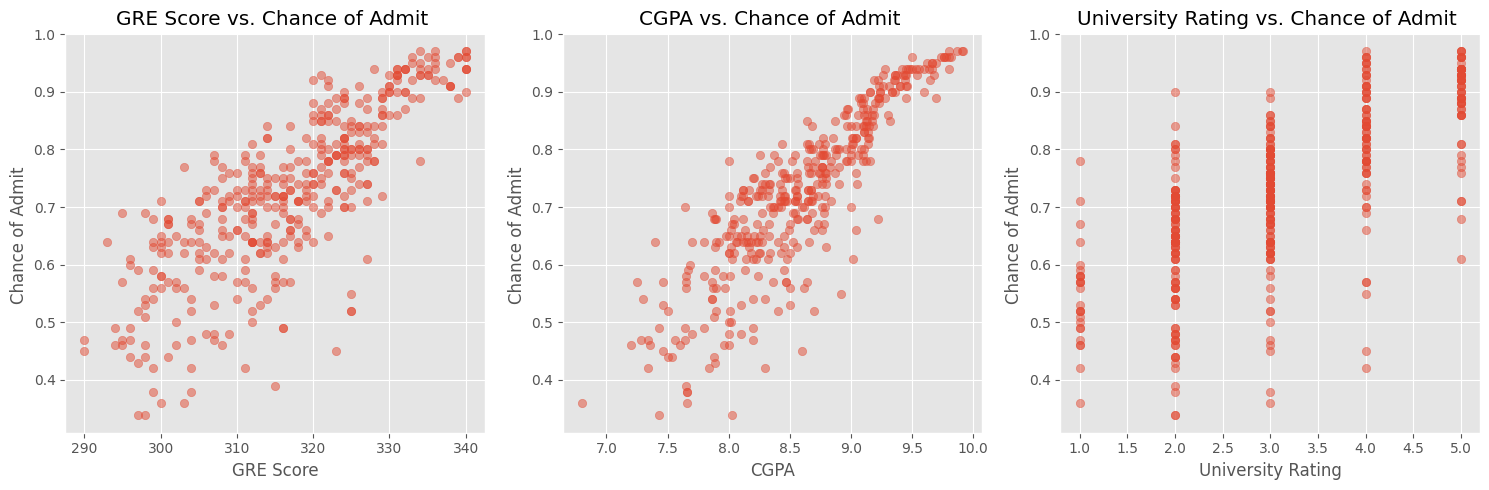


Training set size: 320 samples
Testing set size: 80 samples

--- Model 1: Linear Regression with three selected features ---
Training MSE: 0.004122
Testing MSE: 0.005288

Feature Coefficients:
             Feature  Coefficient
1               CGPA     0.134832
0  University Rating     0.014640
2          GRE Score     0.002939

--- Model 2: Linear Regression with PCA (2 components) ---
Explained variance ratio: [0.83560622 0.11331876]
Total explained variance: 0.9489

PCA Components Composition:
                        PC1       PC2
University Rating  0.555830  0.800440
CGPA               0.597250 -0.196767
GRE Score          0.578226 -0.566197
Training MSE: 0.004348
Testing MSE: 0.005851


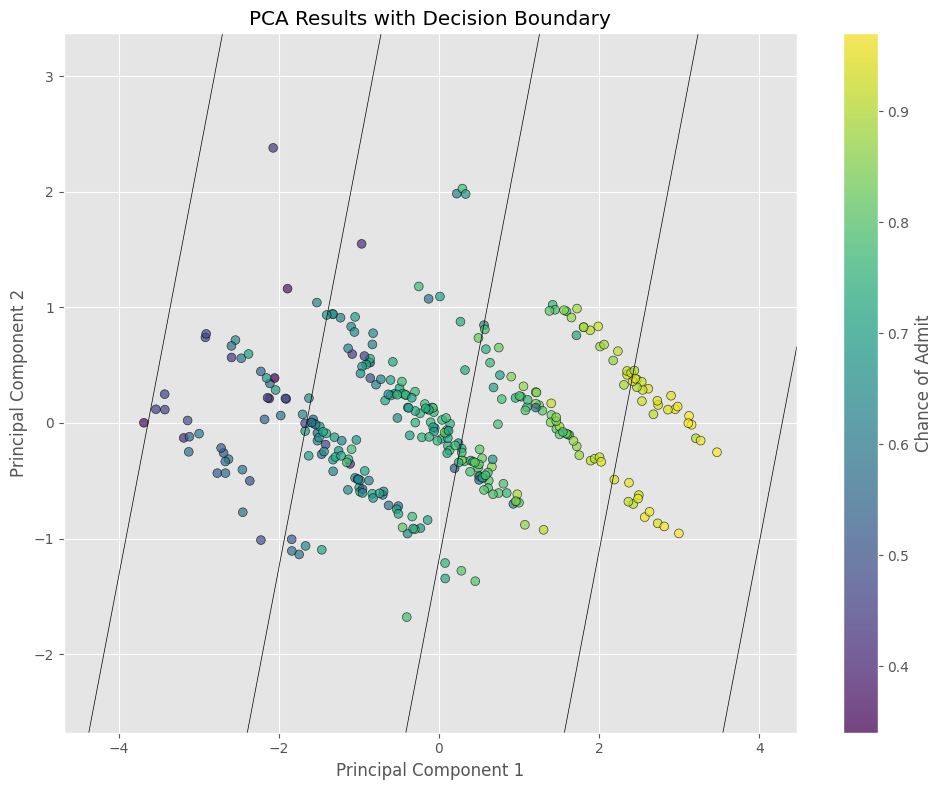


--- Model Comparison ---
Model 1 (Three Features) - Training MSE: 0.004122, Testing MSE: 0.005288
Model 2 (PCA) - Training MSE: 0.004348, Testing MSE: 0.005851
Model 2 degraded performance by 10.64%

Conclusion:
Model 1 (using the three features directly) performed better than the PCA model.
This suggests that the raw features provide more predictive power than the PCA components.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
plt.style.use(['ggplot'])
%matplotlib inline

# Load the dataset
# Note: You'll need to replace 'college_admissions.csv' with your actual file name
data = pd.read_csv('college_admissions.csv')

# Display basic information about the dataset
print("Dataset Info:")
print(data.info())
print("\nFirst 5 rows:")
print(data.head())

# We'll focus on only three features as specified: University Rating, CGPA, and GRE Score
selected_features = ['University Rating', 'CGPA', 'GRE Score']

# Feature Analysis - Examine the three key features
print("\nAnalyzing the three selected features...")

# Feature 1: GRE Score
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(data['GRE Score'], bins=20, color='skyblue', edgecolor='black')
plt.title('GRE Score Distribution')
plt.xlabel('GRE Score')
plt.ylabel('Frequency')

# Feature 2: CGPA
plt.subplot(1, 3, 2)
plt.hist(data['CGPA'], bins=20, color='lightgreen', edgecolor='black')
plt.title('CGPA Distribution')
plt.xlabel('CGPA')
plt.ylabel('Frequency')

# Feature 3: University Rating
plt.subplot(1, 3, 3)
plt.hist(data['University Rating'], bins=5, color='salmon', edgecolor='black')
plt.title('University Rating Distribution')
plt.xlabel('University Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Correlation analysis for the three selected features
print("\nCorrelation with Chance of Admit:")
for column in selected_features:
    correlation = data[column].corr(data['Chance of Admit '])
    print(f"{column}: {correlation:.4f}")

# Scatter plots of the three selected features vs Chance of Admit
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(data['GRE Score'], data['Chance of Admit '], alpha=0.5)
plt.title('GRE Score vs. Chance of Admit ')
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit ')

plt.subplot(1, 3, 2)
plt.scatter(data['CGPA'], data['Chance of Admit '], alpha=0.5)
plt.title('CGPA vs. Chance of Admit ')
plt.xlabel('CGPA')
plt.ylabel('Chance of Admit ')

plt.subplot(1, 3, 3)
plt.scatter(data['University Rating'], data['Chance of Admit '], alpha=0.5)
plt.title('University Rating vs. Chance of Admit ')
plt.xlabel('University Rating')
plt.ylabel('Chance of Admit ')
plt.tight_layout()
plt.show()

# Select only the three features we're focusing on
X = data[selected_features]
y = data['Chance of Admit ']

# Split data into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

# Model 1: Linear Regression with the three selected features
print("\n--- Model 1: Linear Regression with three selected features ---")

# Initialize and train the model
model1 = LinearRegression()
model1.fit(X_train, y_train)

# Make predictions
y_train_pred1 = model1.predict(X_train)
y_test_pred1 = model1.predict(X_test)

# Calculate MSE
train_mse1 = mean_squared_error(y_train, y_train_pred1)
test_mse1 = mean_squared_error(y_test, y_test_pred1)

print(f"Training MSE: {train_mse1:.6f}")
print(f"Testing MSE: {test_mse1:.6f}")

# Feature importance (coefficients)
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model1.coef_
})
print("\nFeature Coefficients:")
print(coefficients.sort_values('Coefficient', ascending=False))

# Save predictions to CSV
pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred1
}).to_csv('model1_predictions.csv', index=False)

# Model 2: Linear Regression with PCA (2 components)
print("\n--- Model 2: Linear Regression with PCA (2 components) ---")

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Explained variance
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total explained variance: {sum(pca.explained_variance_ratio_):.4f}")

# Component composition
print("\nPCA Components Composition:")
component_df = pd.DataFrame(
    pca.components_.T, 
    columns=['PC1', 'PC2'], 
    index=X.columns
)
print(component_df)

# Initialize and train the model
model2 = LinearRegression()
model2.fit(X_train_pca, y_train)

# Make predictions
y_train_pred2 = model2.predict(X_train_pca)
y_test_pred2 = model2.predict(X_test_pca)

# Calculate MSE
train_mse2 = mean_squared_error(y_train, y_train_pred2)
test_mse2 = mean_squared_error(y_test, y_test_pred2)

print(f"Training MSE: {train_mse2:.6f}")
print(f"Testing MSE: {test_mse2:.6f}")

# Save predictions to CSV
pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred2
}).to_csv('model2_predictions.csv', index=False)

# Visualize PCA results with decision boundary
plt.figure(figsize=(10, 8))

# Create a meshgrid for the decision boundary
h = 0.01
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the function values for the whole grid
Z = model2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create a color plot with the results
plt.contour(xx, yy, Z, colors='black', linewidths=0.5)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', 
            edgecolor='k', s=40, alpha=0.7)
plt.colorbar(label='Chance of Admit')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Results with Decision Boundary')
plt.tight_layout()
plt.show()

# Compare both models
print("\n--- Model Comparison ---")
print(f"Model 1 (Three Features) - Training MSE: {train_mse1:.6f}, Testing MSE: {test_mse1:.6f}")
print(f"Model 2 (PCA) - Training MSE: {train_mse2:.6f}, Testing MSE: {test_mse2:.6f}")

# Calculate improvement or degradation
improvement = (test_mse1 - test_mse2) / test_mse1 * 100
if improvement > 0:
    print(f"Model 2 improved performance by {improvement:.2f}%")
else:
    print(f"Model 2 degraded performance by {abs(improvement):.2f}%")

print("\nConclusion:")
if test_mse1 < test_mse2:
    print("Model 1 (using the three features directly) performed better than the PCA model.")
    print("This suggests that the raw features provide more predictive power than the PCA components.")
else:
    print("Model 2 (using PCA) performed better than using the three features directly.")
    print("This suggests that dimension reduction effectively captured the essential patterns in the data.")